In [1]:
!cd ..

In [5]:
!git clone https://github.com/tnmtvv/liquid_time_constant_networks.git

Cloning into 'liquid_time_constant_networks'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 116 (delta 18), reused 9 (delta 9), pack-reused 89 (from 1)
Receiving objects: 100% (116/116), 3.95 MiB | 3.72 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [7]:
%cd ..

c:\Users\tanya\GitHub\LiquidNNs


In [8]:
%cd liquid_time_constant_networks\experiments_with_ltcs

c:\Users\tanya\GitHub\LiquidNNs\liquid_time_constant_networks\experiments_with_ltcs


Alternative download option to bash 

In [9]:
import os
import requests
import zipfile
import gzip
import shutil

# Helper function to download a file
def download_file(url, output_path):
    print(f"Downloading {url}...")
    response = requests.get(url, stream=True)
    with open(output_path, "wb") as file:
        shutil.copyfileobj(response.raw, file)
    print(f"Downloaded: {output_path}")

# Helper function to extract ZIP files
def extract_zip(file_path, extract_to):
    print(f"Extracting {file_path} to {extract_to}...")
    with zipfile.ZipFile(file_path, "r") as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extraction complete: {extract_to}")

# Helper function to extract GZ files
def extract_gz(file_path, output_path):
    print(f"Extracting {file_path} to {output_path}...")
    with gzip.open(file_path, "rb") as gz_file:
        with open(output_path, "wb") as out_file:
            shutil.copyfileobj(gz_file, out_file)
    print(f"Extraction complete: {output_path}")

# Create a base data directory
os.makedirs("data", exist_ok=True)

# Dataset 1: Human Activity Data
download_file("https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip", "UCI_HAR_Dataset.zip")
os.makedirs("data/har", exist_ok=True)
extract_zip("UCI_HAR_Dataset.zip", "data/har")
os.remove("UCI_HAR_Dataset.zip")

# Dataset 2: Gesture Data
download_file("https://archive.ics.uci.edu/ml/machine-learning-databases/00302/gesture_phase_dataset.zip", "gesture_phase_dataset.zip")
os.makedirs("data/gesture", exist_ok=True)
extract_zip("gesture_phase_dataset.zip", "data/gesture")
os.remove("gesture_phase_dataset.zip")

# Dataset 3: Occupancy Data
download_file("https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip", "occupancy_data.zip")
os.makedirs("data/occupancy", exist_ok=True)
extract_zip("occupancy_data.zip", "data/occupancy")
os.remove("occupancy_data.zip")

# Dataset 4: Traffic Data
download_file("https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz", "Metro_Interstate_Traffic_Volume.csv.gz")
os.makedirs("data/traffic", exist_ok=True)
extract_gz("Metro_Interstate_Traffic_Volume.csv.gz", "data/traffic/Metro_Interstate_Traffic_Volume.csv")
os.remove("Metro_Interstate_Traffic_Volume.csv.gz")

# Dataset 5: Ozone Data
download_file("https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data", "eighthr.data")
os.makedirs("data/ozone", exist_ok=True)
shutil.move("eighthr.data", "data/ozone/eighthr.data")

# Dataset 6: Household Power Consumption Data
download_file("https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip", "household_power_consumption.zip")
os.makedirs("data/power", exist_ok=True)
extract_zip("household_power_consumption.zip", "data/power")
os.remove("household_power_consumption.zip")

# Dataset 7: Person Data
download_file("https://archive.ics.uci.edu/ml/machine-learning-databases/00196/ConfLongDemo_JSI.txt", "ConfLongDemo_JSI.txt")
os.makedirs("data/person", exist_ok=True)
shutil.move("ConfLongDemo_JSI.txt", "data/person/ConfLongDemo_JSI.txt")

print("\nAll datasets downloaded and organized successfully!")


Downloaded: UCI_HAR_Dataset.zip
Extracting UCI_HAR_Dataset.zip to data/har...
Extraction complete: data/har
Downloaded: gesture_phase_dataset.zip
Extracting gesture_phase_dataset.zip to data/gesture...
Extraction complete: data/gesture
Downloaded: occupancy_data.zip
Extracting occupancy_data.zip to data/occupancy...
Extraction complete: data/occupancy
Downloaded: Metro_Interstate_Traffic_Volume.csv.gz
Extracting Metro_Interstate_Traffic_Volume.csv.gz to data/traffic/Metro_Interstate_Traffic_Volume.csv...
Extraction complete: data/traffic/Metro_Interstate_Traffic_Volume.csv
Downloaded: eighthr.data
Downloaded: household_power_consumption.zip
Extracting household_power_consumption.zip to data/power...
Extraction complete: data/power
Downloaded: ConfLongDemo_JSI.txt

All datasets downloaded and organized successfully!


In [9]:
!python -u gesture.py --model ctrnn --epoch 20 > output_gest_ctrnn.log 2> error.log

In [49]:
import re
import csv

# Sample log data (replace this with the actual log file content)
# For demonstration purposes, we'll read from a file named 'log_file.log'
file_name =  "output_lstm"
log_file_path = file_name + '.log'

# Regular expression to extract the relevant fields
pattern = re.compile(
    r"Epochs (?P<epoch>\d+), train loss: (?P<train_loss>\d+\.\d+), train acc: (?P<train_acc>\d+\.\d+), "
    r"valid loss: (?P<valid_loss>\d+\.\d+), valid acc: (?P<valid_acc>\d+\.\d+), "
    r"test loss: (?P<test_loss>\d+\.\d+), test acc: (?P<test_acc>\d+\.\d+)\n"
    r"valid prec: (?P<valid_prec>\d+\.\d+|\d+), recall: (?P<recall>\d+\.\d+|\d+)"
)

# Parse the log data
parsed_data = []
with open(log_file_path, 'r') as file:
    log_data = file.read()
    for match in pattern.finditer(log_data):
        parsed_data.append(match.groupdict())

# Write to CSV
csv_file = file_name + ".csv"
with open(csv_file, mode="w", newline="") as file:
    if parsed_data:
        writer = csv.DictWriter(file, fieldnames=parsed_data[0].keys())
        writer.writeheader()
        writer.writerows(parsed_data)
    else:
        print("No data found in the log file.")

print(f"Data has been written to {csv_file}")


Data has been written to output_lstm.csv


In [30]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 270.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 347.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 482.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 499.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 783.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 860.7 kB/s eta 0:00:00a 0:00:01


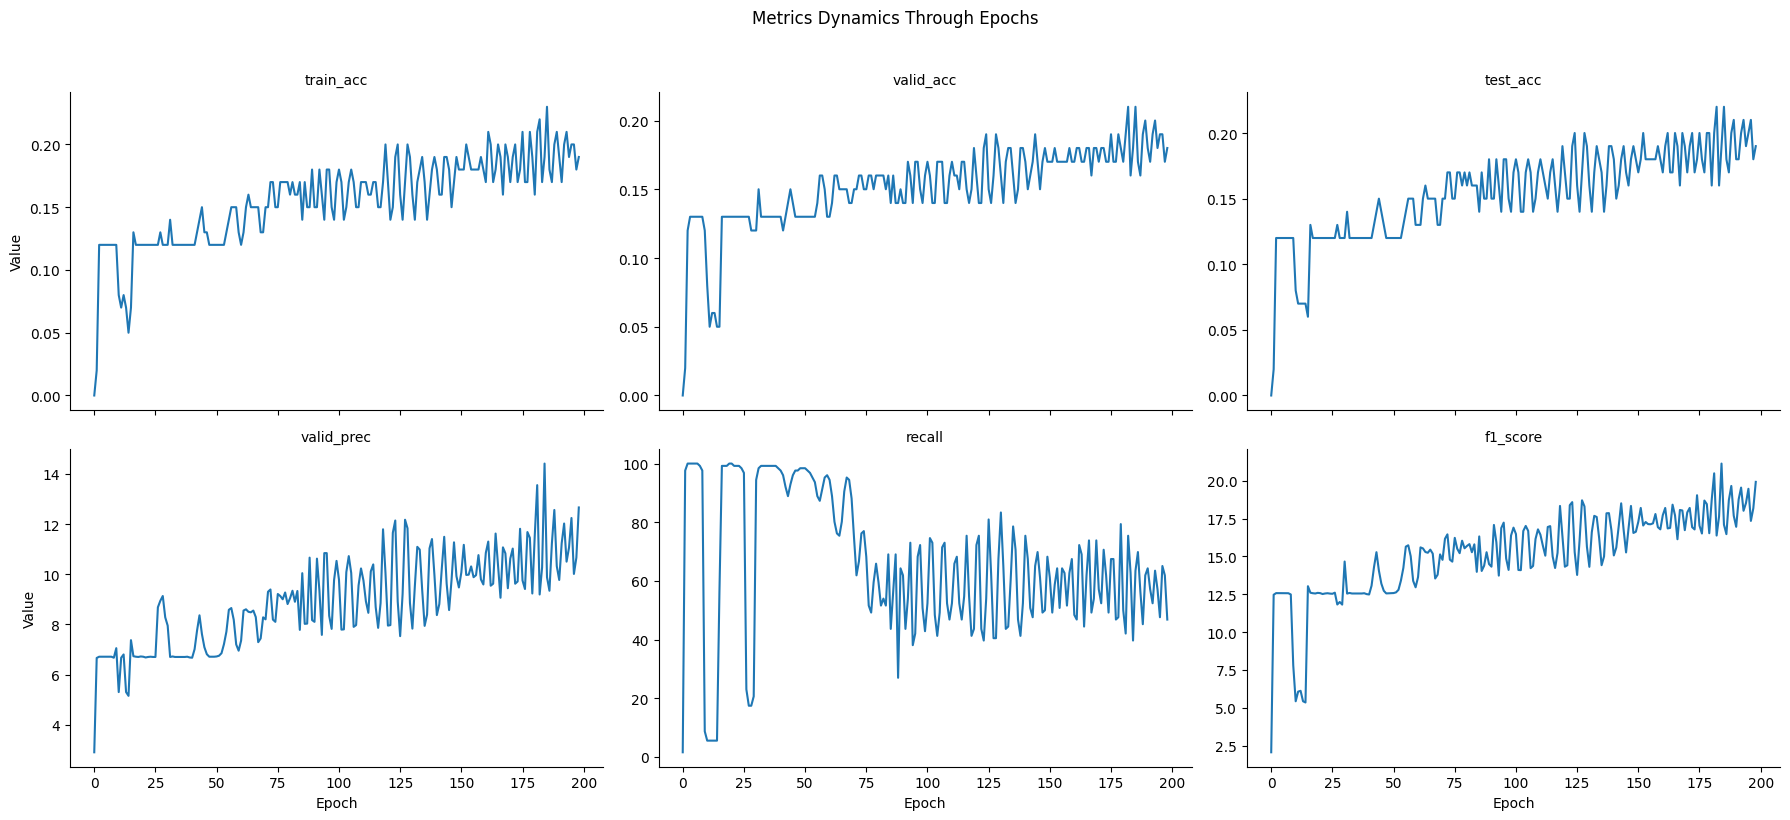

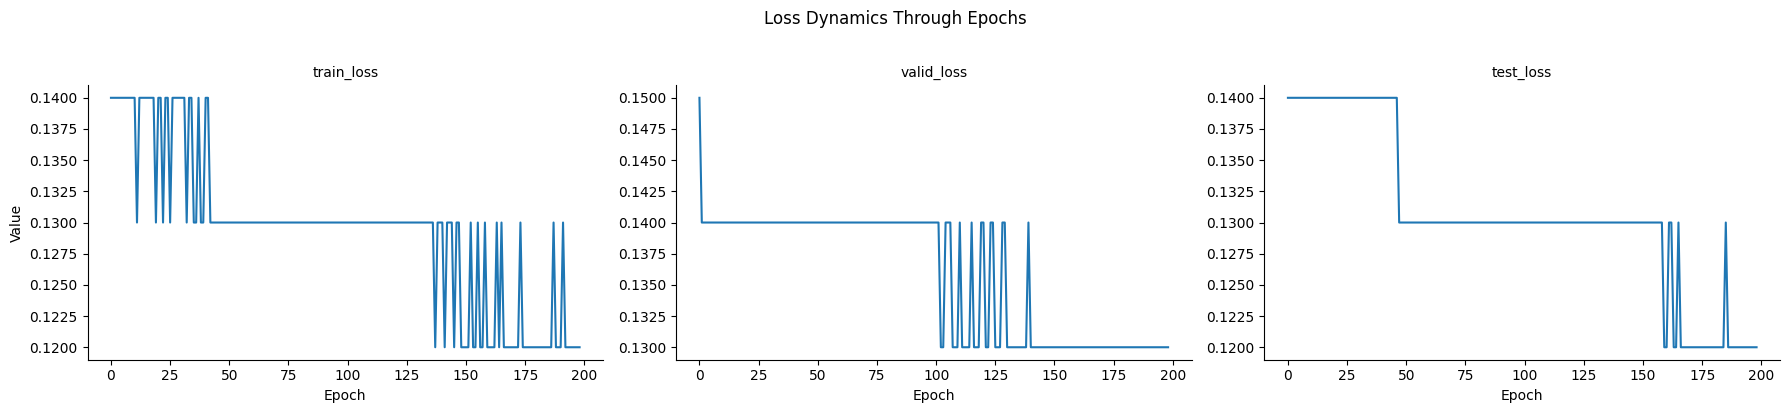

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file (replace 'your_file.csv' with your actual file name)
data_ctrnn = pd.read_csv('output_ctrnn.csv')
data_ltc = pd.read_csv('output_ltc.csv')

data = pd.concat([data_ctrnn, data_ltc])

# Calculate F1 score
data['f1_score'] = 2 * (data['valid_prec'] * data['recall']) / (data['valid_prec'] + data['recall'])

# Prepare the data for FacetGrid
metrics_data = pd.melt(
    data,
    id_vars=['epoch'],
    value_vars=['train_acc', 'valid_acc', 'test_acc', 'valid_prec', 'recall', 'f1_score'],
    var_name='Metric',
    value_name='Value'
)

losses_data = pd.melt(
    data,
    id_vars=['epoch'],
    value_vars=['train_loss', 'valid_loss', 'test_loss'],
    var_name='Loss',
    value_name='Value'
)

# Create a FacetGrid for metrics
g1 = sns.FacetGrid(metrics_data, col="Metric", col_wrap=3, sharey=False, height=4, aspect=1.5)
g1.map(sns.lineplot, "epoch", "Value")
g1.set_titles("{col_name}")
g1.set_axis_labels("Epoch", "Value")
g1.fig.suptitle("Metrics Dynamics Through Epochs", y=1.02)
g1.tight_layout()

# Create a FacetGrid for losses
g2 = sns.FacetGrid(losses_data, col="Loss", col_wrap=3, sharey=False, height=4, aspect=1.5)
g2.map(sns.lineplot, "epoch", "Value")
g2.set_titles("{col_name}")
g2.set_axis_labels("Epoch", "Value")
g2.fig.suptitle("Loss Dynamics Through Epochs", y=1.02)
g2.tight_layout()

plt.show()


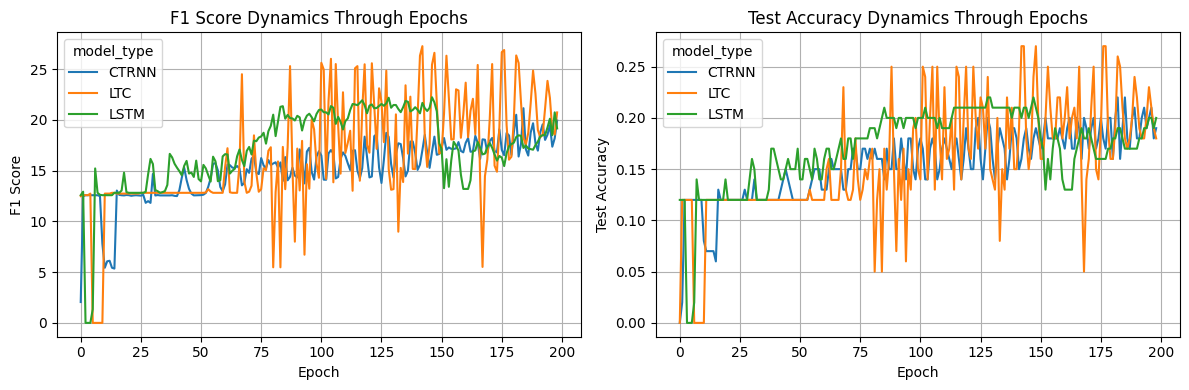

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files
try:
    data_ctrnn = pd.read_csv('output_ctrnn.csv')
    data_ltc = pd.read_csv('output_ltc.csv')
    data_lstm = pd.read_csv('output_lstm.csv')
except FileNotFoundError:
    print("One or all of the files were not found.")
    # You can add alternative actions here if needed

# Add model type to each DataFrame
data_ctrnn['model_type'] = 'CTRNN'
data_ltc['model_type'] = 'LTC'
data_lstm['model_type'] = 'LSTM'

# Reset index before concatenating to avoid duplicate indices
data_ctrnn = data_ctrnn.reset_index(drop=True)
data_ltc = data_ltc.reset_index(drop=True)
data_lstm = data_lstm.reset_index(drop=True)

# Concatenate the data
data = pd.concat([data_ctrnn, data_ltc, data_lstm])

# Calculate F1 score
data['f1_score'] = 2 * (data['valid_prec'] * data['recall']) / (data['valid_prec'] + data['recall'])

# Handle NaN values in F1 score
data['f1_score'] = data['f1_score'].fillna(0)

# Create subplots for F1 score and test accuracy
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot F1 score
sns.lineplot(ax=axes[0], x='epoch', y='f1_score', hue='model_type', data=data)
axes[0].set_title("F1 Score Dynamics Through Epochs")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("F1 Score")
axes[0].grid()

# Plot test accuracy
sns.lineplot(ax=axes[1], x='epoch', y='test_acc', hue='model_type', data=data)
axes[1].set_title("Test Accuracy Dynamics Through Epochs")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Test Accuracy")
axes[1].grid()

plt.tight_layout()
plt.show()
